In [1]:
from util_funcs import *

# Setup toy dataset

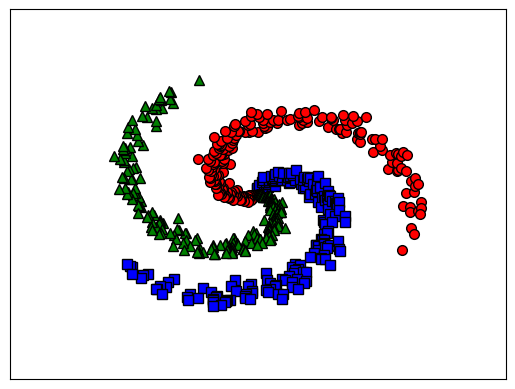

In [2]:

N = 200 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((N*C, d0)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
# plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=40, cmap=plt.cm.Spectral)

plt.plot(X[:N, 0], X[:N, 1], 'bs', markersize = 7, markeredgecolor = 'k')
plt.plot(X[N:2*N, 0], X[N:2*N, 1], 'ro', markersize = 7, markeredgecolor = 'k')
plt.plot(X[2*N:, 0], X[2*N:, 1], 'g^', markersize = 7, markeredgecolor = 'k')
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.show()

# Initialization + SAGA Variance + Performing update along the way

In [8]:
d0 = 2
d1 = h = 100 # size of hidden layer
d2 = C = 3
nIter = 10000
# initialize parameters randomly
(W1, b1, W2, b2) = mlp_init(d0, d1, d2)

## 0 iter

In [9]:
gradHistory = gradTestSAGA(X, y, W1, b1, W2, b2, nIter = nIter)
trueGrad = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 1)

# Expected gradient diff
print(np.mean(relativeError(np.mean(gradHistory['dW2'], axis = 0), trueGrad['dW2'][0])))

# Variance 
print(np.mean(np.mean((gradHistory['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

numStableCheck = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 10)
print(np.mean(relativeError(np.mean(numStableCheck['dW2'], axis = 0), trueGrad['dW2'][0])))
print(np.mean(np.mean((numStableCheck['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

1.197834358469245e-13
2.09871801069158e-37
2.413505911809178e-16
3.1021069259107765e-38


In [10]:
gradHistory = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = 1, nIter = nIter)
trueGrad = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 1)

# Expected gradient diff
print(np.mean(relativeError(np.mean(gradHistory['dW2'], axis = 0), trueGrad['dW2'][0])))

# Variance 
print(np.mean(np.mean((gradHistory['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

numStableCheck = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 10)
print(np.mean(relativeError(np.mean(numStableCheck['dW2'], axis = 0), trueGrad['dW2'][0])))
print(np.mean(np.mean((numStableCheck['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

0.07335273572066602
3.757736137532011e-06
2.3585468779755584e-16
2.31755800414861e-38


## 1 iter

In [11]:
(W1, b1, W2, b2, loss_hist, cache) = mlpSAGA(X, y, W1, b1, W2, b2, 1e-1, nIter = 1)

y_predSAGA = mlp_predict(X, W1, b1, W2, b2)
accSAGA = 100*np.mean(y_predSAGA == y)
print('training accuracy: %.2f %%' % accSAGA)

iter 0, loss: 1.098673
training accuracy: 33.50 %


In [12]:
gradHistory = gradTestSAGA(X, y, W1, b1, W2, b2, cache = cache, nIter = nIter)
trueGrad = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 1)

# Expected gradient diff
print(np.mean(relativeError(np.mean(gradHistory['dW2'], axis = 0), trueGrad['dW2'][0])))

# Variance 
print(np.mean(np.mean((gradHistory['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

numStableCheck = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 10)
print(np.mean(relativeError(np.mean(numStableCheck['dW2'], axis = 0), trueGrad['dW2'][0])))
print(np.mean(np.mean((numStableCheck['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

0.0014744897975366934
1.974032214726571e-09
3.0092646193076225e-16
2.7466178127552354e-38


In [13]:
gradHistory = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = 1, nIter = nIter)
trueGrad = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 1)

# Expected gradient diff
print(np.mean(relativeError(np.mean(gradHistory['dW2'], axis = 0), trueGrad['dW2'][0])))

# Variance 
print(np.mean(np.mean((gradHistory['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

numStableCheck = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 10)
print(np.mean(relativeError(np.mean(numStableCheck['dW2'], axis = 0), trueGrad['dW2'][0])))
print(np.mean(np.mean((numStableCheck['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

0.06811848872108013
3.701593848726518e-06
2.4511916715650253e-16
2.331997916229271e-38


## 5 iters

In [14]:
(W1, b1, W2, b2, loss_hist, cache) = mlpSAGA(X, y, W1, b1, W2, b2, 1e-1, cache = cache, nIter = 4)

y_predSAGA = mlp_predict(X, W1, b1, W2, b2)
accSAGA = 100*np.mean(y_predSAGA == y)
print('training accuracy: %.2f %%' % accSAGA)

iter 0, loss: 1.098643
training accuracy: 50.00 %


In [15]:
gradHistory = gradTestSAGA(X, y, W1, b1, W2, b2, cache = cache, nIter = nIter)
trueGrad = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 1)

# Expected gradient diff
print(np.mean(relativeError(np.mean(gradHistory['dW2'], axis = 0), trueGrad['dW2'][0])))

# Variance 
print(np.mean(np.mean((gradHistory['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

numStableCheck = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 10)
print(np.mean(relativeError(np.mean(numStableCheck['dW2'], axis = 0), trueGrad['dW2'][0])))
print(np.mean(np.mean((numStableCheck['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

0.01456700469276375
5.3933671180551924e-08
5.995518962169708e-16
2.616133229956403e-38


In [16]:
gradHistory = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = 1, nIter = nIter)
trueGrad = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 1)

# Expected gradient diff
print(np.mean(relativeError(np.mean(gradHistory['dW2'], axis = 0), trueGrad['dW2'][0])))

# Variance 
print(np.mean(np.mean((gradHistory['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

numStableCheck = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 10)
print(np.mean(relativeError(np.mean(numStableCheck['dW2'], axis = 0), trueGrad['dW2'][0])))
print(np.mean(np.mean((numStableCheck['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

0.0763916130295668
3.852782898032125e-06
3.699222444244529e-16
3.3536637169533296e-38


## 20 iters

In [17]:
(W1, b1, W2, b2, loss_hist, cache) = mlpSAGA(X, y, W1, b1, W2, b2, 1e-1, cache = cache, nIter = 15)

y_predSAGA = mlp_predict(X, W1, b1, W2, b2)
accSAGA = 100*np.mean(y_predSAGA == y)
print('training accuracy: %.2f %%' % accSAGA)

iter 0, loss: 1.098525
training accuracy: 62.17 %


In [18]:
gradHistory = gradTestSAGA(X, y, W1, b1, W2, b2, cache = cache, nIter = nIter)
trueGrad = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 1)

# Expected gradient diff
print(np.mean(relativeError(np.mean(gradHistory['dW2'], axis = 0), trueGrad['dW2'][0])))

# Variance 
print(np.mean(np.mean((gradHistory['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

numStableCheck = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 10)
print(np.mean(relativeError(np.mean(numStableCheck['dW2'], axis = 0), trueGrad['dW2'][0])))
print(np.mean(np.mean((numStableCheck['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

0.03906638481881341
7.862936695043857e-07
2.826575550729558e-16
4.16992057016375e-38


In [19]:
gradHistory = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = 1, nIter = nIter)
trueGrad = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 1)

# Expected gradient diff
print(np.mean(relativeError(np.mean(gradHistory['dW2'], axis = 0), trueGrad['dW2'][0])))

# Variance 
print(np.mean(np.mean((gradHistory['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

numStableCheck = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 10)
print(np.mean(relativeError(np.mean(numStableCheck['dW2'], axis = 0), trueGrad['dW2'][0])))
print(np.mean(np.mean((numStableCheck['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

0.03961376563846057
4.8152264399066056e-06
2.304518210882198e-16
3.474953707157105e-38


## 50 iters

In [20]:
(W1, b1, W2, b2, loss_hist, cache) = mlpSAGA(X, y, W1, b1, W2, b2, 1e-1, cache = cache, nIter = 30)

y_predSAGA = mlp_predict(X, W1, b1, W2, b2)
accSAGA = 100*np.mean(y_predSAGA == y)
print('training accuracy: %.2f %%' % accSAGA)

iter 0, loss: 1.098101
training accuracy: 60.67 %


In [21]:
gradHistory = gradTestSAGA(X, y, W1, b1, W2, b2, cache = cache, nIter = nIter)
trueGrad = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 1)

# Expected gradient diff
print(np.mean(relativeError(np.mean(gradHistory['dW2'], axis = 0), trueGrad['dW2'][0])))

# Variance 
print(np.mean(np.mean((gradHistory['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

numStableCheck = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 10)
print(np.mean(relativeError(np.mean(numStableCheck['dW2'], axis = 0), trueGrad['dW2'][0])))
print(np.mean(np.mean((numStableCheck['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

0.08786596830080473
3.7350360315372025e-06
4.850948335309399e-16
8.029070936762436e-38


In [22]:
gradHistory = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = 1, nIter = nIter)
trueGrad = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 1)

# Expected gradient diff
print(np.mean(relativeError(np.mean(gradHistory['dW2'], axis = 0), trueGrad['dW2'][0])))

# Variance 
print(np.mean(np.mean((gradHistory['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

numStableCheck = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 10)
print(np.mean(relativeError(np.mean(numStableCheck['dW2'], axis = 0), trueGrad['dW2'][0])))
print(np.mean(np.mean((numStableCheck['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

0.087435468112616
9.269132398238703e-06
2.936788197090465e-16
6.575560539698705e-38


## 100 iters

In [23]:
(W1, b1, W2, b2, loss_hist, cache) = mlpSAGA(X, y, W1, b1, W2, b2, 1e-1, cache = cache, nIter = 50)

y_predSAGA = mlp_predict(X, W1, b1, W2, b2)
accSAGA = 100*np.mean(y_predSAGA == y)
print('training accuracy: %.2f %%' % accSAGA)

iter 0, loss: 1.097119
training accuracy: 46.17 %


In [24]:
gradHistory = gradTestSAGA(X, y, W1, b1, W2, b2, cache = cache, nIter = nIter)
trueGrad = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 1)

# Expected gradient diff
print(np.mean(relativeError(np.mean(gradHistory['dW2'], axis = 0), trueGrad['dW2'][0])))

# Variance 
print(np.mean(np.mean((gradHistory['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

numStableCheck = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 10)
print(np.mean(relativeError(np.mean(numStableCheck['dW2'], axis = 0), trueGrad['dW2'][0])))
print(np.mean(np.mean((numStableCheck['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

0.11068597751614716
4.723041766410799e-05
nan
3.6454437121391145e-37


/tmp/ipykernel_134697/236984099.py:208: RuntimeWarning: invalid value encountered in divide
  return np.abs(a - b) / np.maximum(np.abs(a), np.abs(b))


In [25]:
gradHistory = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = 1, nIter = nIter)
trueGrad = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 1)

# Expected gradient diff
print(np.mean(relativeError(np.mean(gradHistory['dW2'], axis = 0), trueGrad['dW2'][0])))

# Variance 
print(np.mean(np.mean((gradHistory['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

numStableCheck = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 10)
print(np.mean(relativeError(np.mean(numStableCheck['dW2'], axis = 0), trueGrad['dW2'][0])))
print(np.mean(np.mean((numStableCheck['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

nan
6.40966956272144e-05
nan
4.475385714311288e-37


/tmp/ipykernel_134697/236984099.py:208: RuntimeWarning: invalid value encountered in divide
  return np.abs(a - b) / np.maximum(np.abs(a), np.abs(b))


## 1000 iters

In [26]:
(W1, b1, W2, b2, loss_hist, cache) = mlpSAGA(X, y, W1, b1, W2, b2, 1e-1, nIter = 900)

y_predSAGA = mlp_predict(X, W1, b1, W2, b2)
accSAGA = 100*np.mean(y_predSAGA == y)
print('training accuracy: %.2f %%' % accSAGA)

iter 0, loss: 1.091961
training accuracy: 62.83 %


In [27]:
gradHistory = gradTestSAGA(X, y, W1, b1, W2, b2, cache = cache, nIter = nIter)
trueGrad = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 1)

# Expected gradient diff
print(np.mean(relativeError(np.mean(gradHistory['dW2'], axis = 0), trueGrad['dW2'][0])))

# Variance 
print(np.mean(np.mean((gradHistory['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

numStableCheck = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 10)
print(np.mean(relativeError(np.mean(numStableCheck['dW2'], axis = 0), trueGrad['dW2'][0])))
print(np.mean(np.mean((numStableCheck['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

nan
0.0013727509264688112
nan
1.262442547650306e-35


/tmp/ipykernel_134697/236984099.py:208: RuntimeWarning: invalid value encountered in divide
  return np.abs(a - b) / np.maximum(np.abs(a), np.abs(b))


In [28]:
gradHistory = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = 1, nIter = nIter)
trueGrad = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 1)

# Expected gradient diff
print(np.mean(relativeError(np.mean(gradHistory['dW2'], axis = 0), trueGrad['dW2'][0])))

# Variance 
print(np.mean(np.mean((gradHistory['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

numStableCheck = mlp_gradTest(X, y, W1, b1, W2, b2, batchSize = X.shape[0], nIter = 10)
print(np.mean(relativeError(np.mean(numStableCheck['dW2'], axis = 0), trueGrad['dW2'][0])))
print(np.mean(np.mean((numStableCheck['dW2'] - trueGrad['dW2']) ** 2, axis = 0)))

nan
0.004619879357429992
nan
1.4396645661142336e-35


/tmp/ipykernel_134697/236984099.py:208: RuntimeWarning: invalid value encountered in divide
  return np.abs(a - b) / np.maximum(np.abs(a), np.abs(b))
